In [3]:
import pandas as pd

# 1. Leer los dos Excels
df_aemet = pd.read_excel("df_aemet_final.xlsx")     # tiene la columna "año"
df_vivino = pd.read_excel("vinos_vivino2.xlsx")     # tiene la columna "year"

# (Opcional pero recomendable) Asegurar que las columnas son numéricas
df_aemet["año"] = pd.to_numeric(df_aemet["año"], errors="coerce")
df_vivino["year"] = pd.to_numeric(df_vivino["year"], errors="coerce")

# 2. Hacer el merge por año/year
df_merged = df_vivino.merge(
    df_aemet,
    left_on="year",
    right_on="año",
    how="left"          # o "inner" si solo quieres los años comunes
)

# 3. Guardar el resultado en un nuevo Excel
df_merged.to_excel("vinos_aemet_merged.xlsx", index=False)


In [4]:
# limpiar df donde la columna "año" está vacía
df_merged_cleaned = df_merged.dropna(subset=["año"])
df_merged_cleaned.to_excel("vinos_aemet_merged_cleaned.xlsx", index=False)
df_merged_cleaned.head()

,pagina,vintage_id,nombre,seo_name,year,rating,n_ratings,precio,moneda,año,precipitacion_total_mensual(mm),num_dias_temp_mayor30(c),num_dias_temp_menor0(c),temp_media_mes(c),humedad_relativa(%),precipitacion_media_anual_ene_dic(mm)
0,1,3358221,Dominio de Pingus Pingus 2004,dominio-de-pingus-pingus-2004,2004.0,4.7,290,4001.25,EUR,2004.0,0.05,6.60,1.00,16.24,48.44,8.70
1,1,14284207,Dominio de Pingus Pingus 2015,dominio-de-pingus-pingus-2015,2015.0,4.7,259,2390.00,EUR,2015.0,20.80,8.83,0.67,17.83,53.33,38.06
2,1,156095165,Dominio de Pingus Pingus 2018,dominio-de-pingus-pingus-2018,2018.0,4.6,125,2240.00,EUR,2018.0,41.13,6.67,0.17,17.48,55.50,81.17
5,1,3354001,Dominio de Pingus Pingus 2005,dominio-de-pingus-pingus-2005,2005.0,4.7,307,1785.96,EUR,2005.0,18.83,2.00,2.50,13.20,44.06,42.55
6,1,88806732,Dominio de Pingus Pingus 2016,dominio-de-pingus-pingus-2016,2016.0,4.7,249,1500.00,EUR,2016.0,29.20,9.33,1.50,17.05,54.40,65.11


In [ ]:
#Estadisticas descriptivas del dataframe limpio -> df_merged_cleaned
df_merged_cleaned.describe()    

,pagina,vintage_id,year,rating,n_ratings,precio,año,precipitacion_total_mensual(mm),num_dias_temp_mayor30(c),num_dias_temp_menor0(c),temp_media_mes(c),humedad_relativa(%),precipitacion_media_anual_ene_dic(mm)
count,2349.000000,2.349000e+03,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000
mean,50.468284,1.489964e+08,2018.911026,3.966624,843.782035,64.867493,2018.911026,27.722610,7.420570,0.931162,17.405155,52.205534,52.212401
std,28.746105,5.083380e+07,3.822644,0.677254,2201.282679,175.022598,3.822644,9.689724,1.565565,0.576997,0.642377,3.267295,13.866637
min,1.000000,8.740300e+04,2004.000000,0.000000,0.000000,3.990000,2004.000000,0.050000,2.000000,0.000000,13.200000,44.060000,8.700000
25%,26.000000,1.573303e+08,2018.000000,3.800000,84.000000,13.190000,2018.000000,22.500000,6.500000,0.330000,17.050000,49.750000,46.180000
50%,50.000000,1.676347e+08,2020.000000,4.100000,263.000000,24.800000,2020.000000,28.730000,7.170000,1.170000,17.130000,53.500000,50.280000
75%,75.000000,1.736493e+08,2021.000000,4.300000,716.000000,53.950000,2021.000000,32.650000,8.330000,1.170000,17.730000,54.000000,61.230000
max,100.000000,1.819659e+08,2024.000000,4.800000,56453.000000,4001.250000,2024.000000,60.750000,10.000000,2.500000,18.500000,62.330000,81.170000


In [8]:

# 1. Leer el Excel ya mergeado
df = pd.read_excel("vinos_aemet_merged_cleaned.xlsx")

# 2. Asegurar que rating es numérico
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# 3. Quedarnos solo con vinos con rating > 4.5
df_top = df[df["rating"] > 4.5].copy()

# 4. Columnas AEMET: de la 10ª en adelante (J–P en tu Excel)
#    Si cambias el orden de columnas, ajusta este índice.
cols_aemet = df.columns[9:]

# 5. Calcular rangos (Q25, mediana y Q75) para cada variable AEMET
summary = df_top[cols_aemet].quantile([0.25, 0.5, 0.75]).T
summary.columns = ["q25", "mediana", "q75"]

# 6. Mostrar por pantalla
print("Rangos 'ideales' AEMET para vinos con rating > 4.5:\n")
print(summary)

# 7. (Opcional) Guardar el resumen en un Excel
summary.to_excel("rangos_aemet_vinos_top.xlsx")


Rangos 'ideales' AEMET para vinos con rating > 4.5:

                                           q25   mediana        q75
año                                    2010.75  2015.000  2018.0000
precipitacion_total_mensual(mm)          20.60    22.500    29.4700
num_dias_temp_mayor30(c)                  4.00     6.670     8.0825
num_dias_temp_menor0(c)                   0.17     0.915     1.1700
temp_media_mes(c)                        16.96    17.080    17.4800
humedad_relativa(%)                      50.96    54.000    55.7300
precipitacion_media_anual_ene_dic(mm)    38.06    50.280    59.8900


In [ ]:
#Cargamos y preparamos los datos del fichero excel final llamado "vinos_aemet_merged_cleaned.xlsx"
import pandas as pd
import matplotlib.pyplot as plt

# Leer Excel mergeado
df = pd.read_excel("vinos_aemet_merged_cleaned.xlsx")

# Columnas numéricas (según tus nombres)
cols_aemet = [
    "precipitacion_total_mensual(mm)",
    "num_dias_temp_mayor30(c)",
    "num_dias_temp_menor0(c)",
    "temp_media_mes(c)",
    "humedad_relativa(%)",
    "precipitacion_media_anual_ene_dic(mm)",
]

numeric_cols = ["rating", "n_ratings", "precio"] + cols_aemet

# Asegurar tipos numéricos (por si hay comas decimales)
for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Filtro de vinos con rating válido
df = df.dropna(subset=["rating"])

# Dataset de vinos top (rating > 4.5) que usaremos en algunos puntos
df_top = df[df["rating"] > 4.5].copy()


   year    rating
0  2004  4.330435
1  2005  4.226667
2  2006  4.335294
3  2007  4.488889
4  2008  4.440000


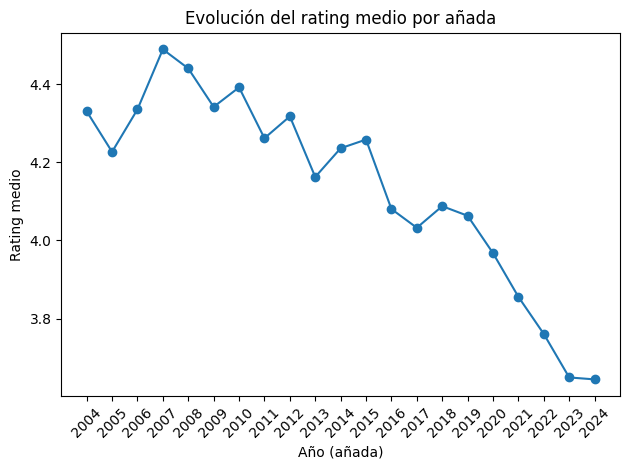

In [8]:
# 1. Evolución de rating medio por año
rating_year = df.groupby("year")["rating"].mean().reset_index()

print(rating_year.head())

plt.figure()
plt.plot(rating_year["year"], rating_year["rating"], marker="o")
plt.xlabel("Año (añada)")
plt.ylabel("Rating medio")
plt.title("Evolución del rating medio por añada")
plt.xticks(rating_year["year"], rotation=45)   # un tick por año
plt.tight_layout()
plt.show()


Los datos sugieren dos etapas muy diferenciadas: unas añadas 2006–2012 excepcionalmente bien valoradas, y una tendencia descendente sostenida desde 2015 que culmina en las cosechas más recientes, claramente por debajo del nivel histórico de calidad percibida.

Correlación rating vs precipitacion_total_mensual(mm): 0.022


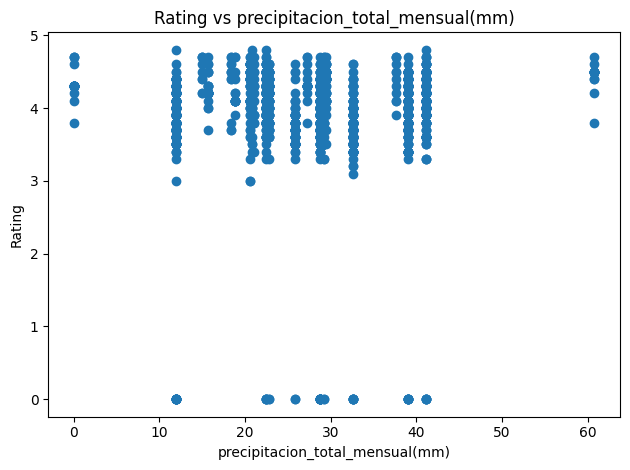

Correlación rating vs num_dias_temp_mayor30(c): -0.072


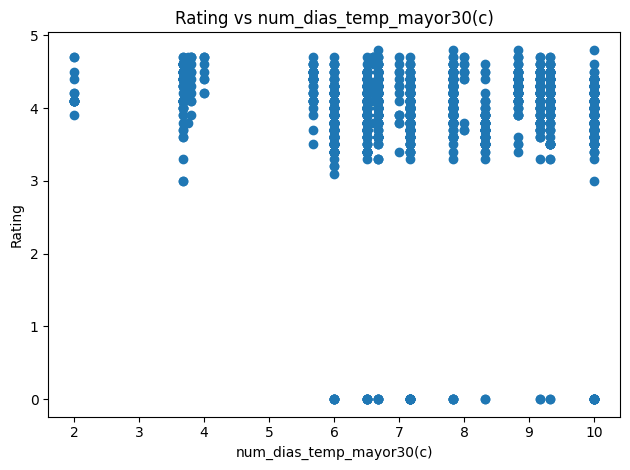

Correlación rating vs num_dias_temp_menor0(c): -0.116


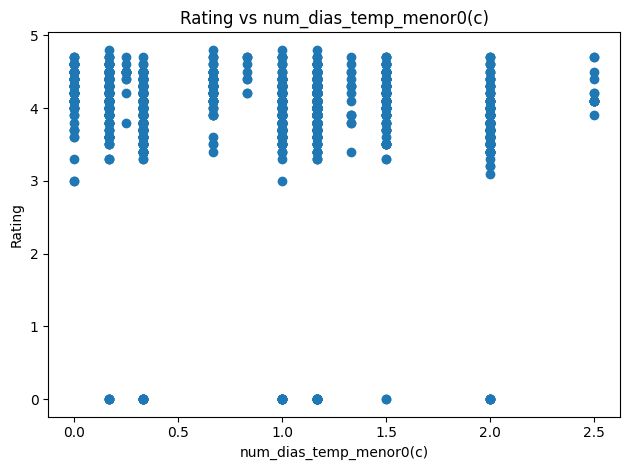

Correlación rating vs temp_media_mes(c): -0.087


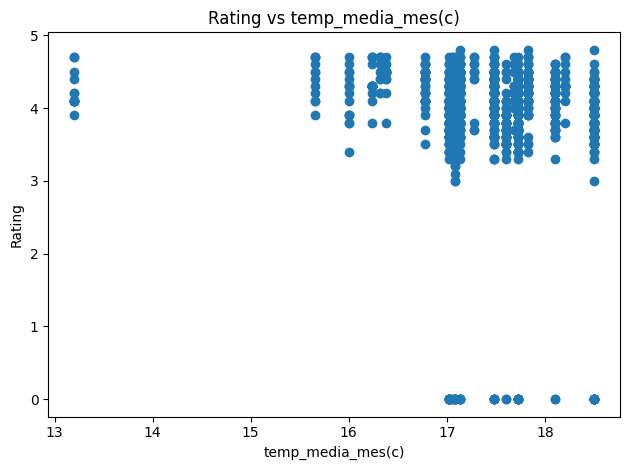

Correlación rating vs humedad_relativa(%): 0.138


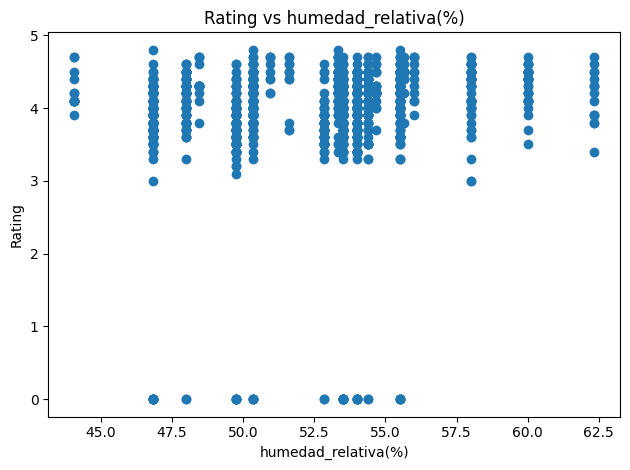

Correlación rating vs precipitacion_media_anual_ene_dic(mm): 0.074


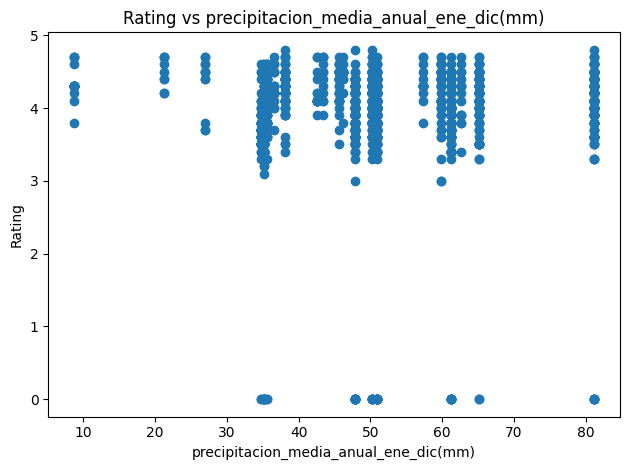

In [9]:
# 2. Scatter rating vs cada variable climática + correlación
for col in cols_aemet:
    correl = df[[col, "rating"]].corr().iloc[0, 1]
    print(f"Correlación rating vs {col}: {correl:.3f}")

    plt.figure()
    plt.scatter(df[col], df["rating"])
    plt.xlabel(col)
    plt.ylabel("Rating")
    plt.title(f"Rating vs {col}")
    plt.tight_layout()
    plt.show()


Cuando analizamos las valoraciones de los vinos frente a las variables climáticas (precipitación, temperatura, días extremos, humedad…), no encontramos relaciones fuertes: las correlaciones son muy bajas y, visualmente, vemos vinos muy bien y muy mal valorados bajo prácticamente cualquier condición climática dentro del rango observado.

La única señal ligeramente más clara es la humedad relativa, donde los vinos mejor puntuados tienden a concentrarse en rangos intermedios de humedad, alejados de los extremos. Aun así, el efecto es débil.

Esto sugiere que, en nuestro dataset, la calidad percibida del vino está mucho más condicionada por otros factores (bodega, prácticas de viticultura y elaboración, posicionamiento, precio, etc.) que por el clima medio del año.

grupo_rating
< 4.0      1169
4.0–4.5    1088
> 4.5        92
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

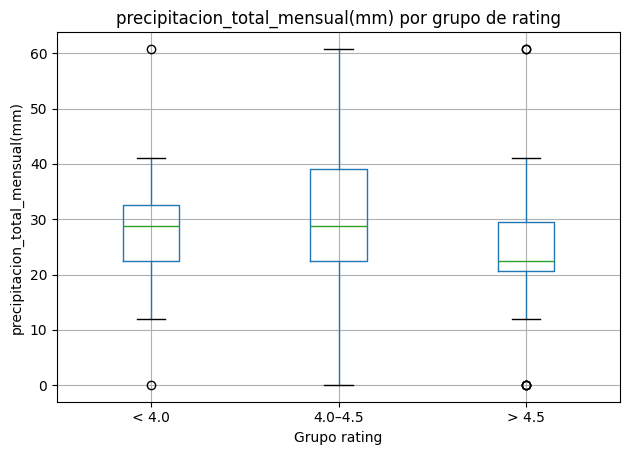

<Figure size 640x480 with 0 Axes>

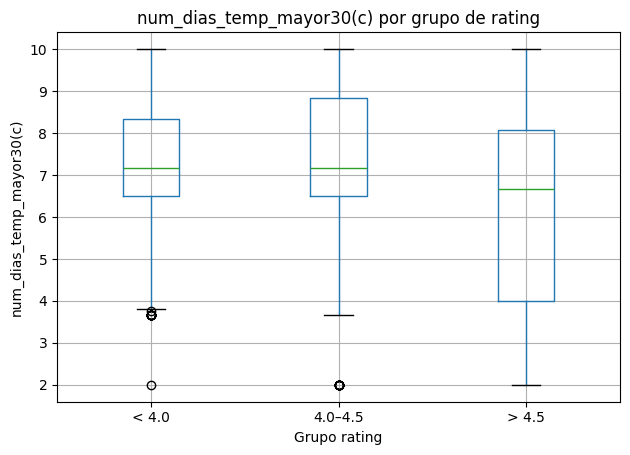

<Figure size 640x480 with 0 Axes>

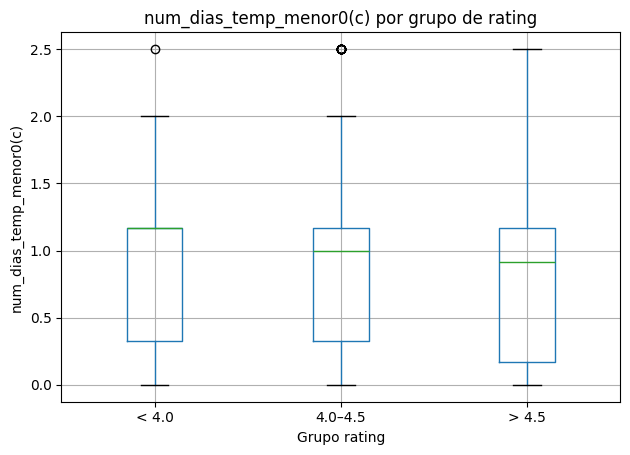

<Figure size 640x480 with 0 Axes>

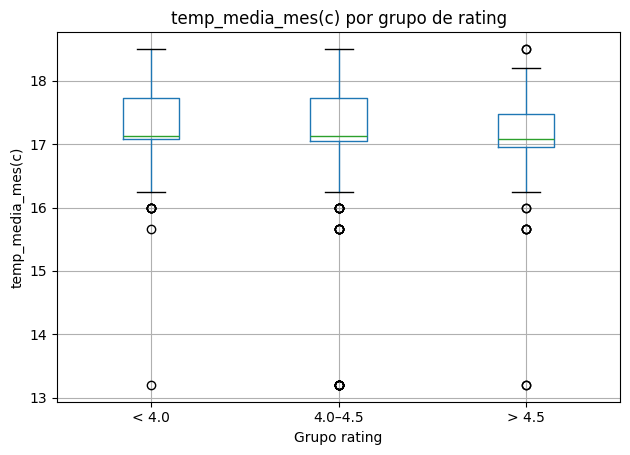

<Figure size 640x480 with 0 Axes>

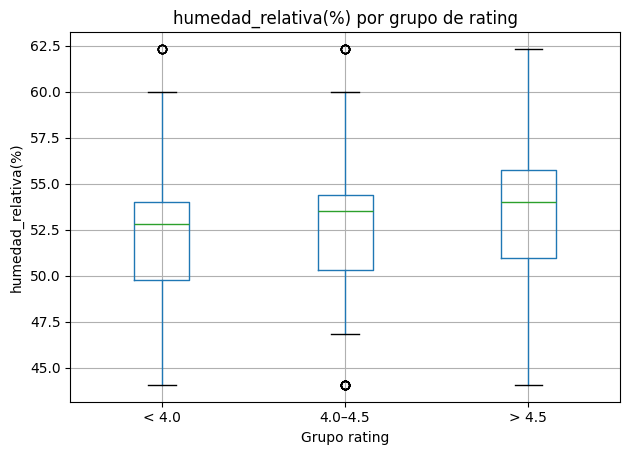

<Figure size 640x480 with 0 Axes>

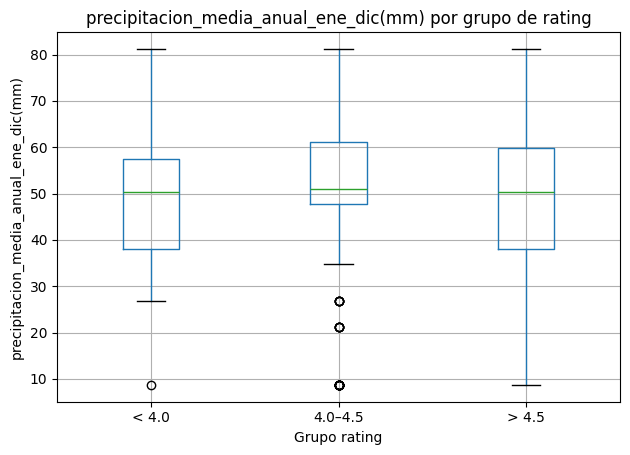

In [10]:
# 3. Grupos de rating
bins = [0, 4.0, 4.5, df["rating"].max() + 0.01]
labels = ["< 4.0", "4.0–4.5", "> 4.5"]
df["grupo_rating"] = pd.cut(df["rating"], bins=bins, labels=labels, include_lowest=True)

print(df["grupo_rating"].value_counts())

# Boxplots de clima por grupo de rating
for col in cols_aemet:
    plt.figure()
    df.boxplot(column=col, by="grupo_rating")
    plt.title(f"{col} por grupo de rating")
    plt.suptitle("")  # quitar título extra de pandas
    plt.xlabel("Grupo rating")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Al comparar la distribución de las variables climáticas por grupos de rating (<4, 4,0–4,5 y >4,5), vemos que las cajas se solapan fuertemente en casi todas las métricas: precipitación, temperatura media y días extremos de calor o frío apenas muestran diferencias entre vinos mejor y peor valorados.

La única señal ligeramente consistente aparece en la humedad relativa, donde los vinos con rating >4,5 tienden a concentrarse en rangos intermedios (aprox. 50–55 %), evitando condiciones claramente más secas.

En conjunto, el clima medio del año parece jugar un papel secundario en la calidad percibida; otros factores (bodega, prácticas de elaboración, posicionamiento, precio, etc.) son probablemente mucho más determinantes.

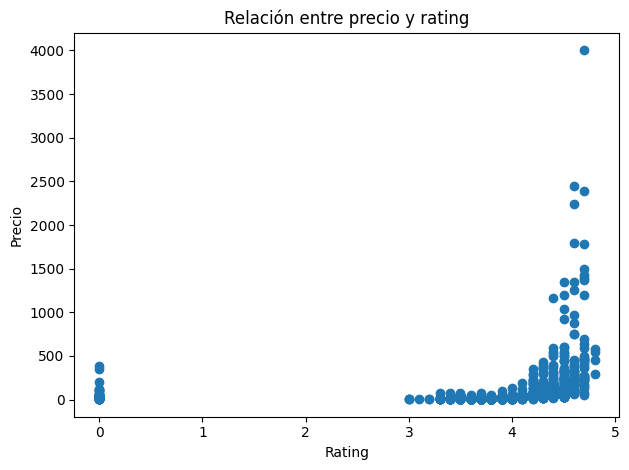

In [11]:
# 4a. Relación precio–rating
plt.figure()
plt.scatter(df["rating"], df["precio"])
plt.xlabel("Rating")
plt.ylabel("Precio")
plt.title("Relación entre precio y rating")
plt.tight_layout()
plt.show()


A diferencia de las variables climáticas, la relación entre precio y valoración es clara: por debajo de 4,0 el precio se mantiene relativamente contenido, mientras que a partir de 4,5 se dispara la dispersión y aparecen los vinos premium y super-premium.

Es decir, no todo vino bien valorado es caro, pero prácticamente todos los vinos muy caros tienen una valoración alta. 

  precip_bin     precio
0   Muy baja  90.075245
1       Baja  45.518650
2       Alta  52.516432
3   Muy alta  81.752042


C:\Users\marta\AppData\Local\Temp\ipykernel_33476\1265098625.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_precip = df.groupby("precip_bin")["precio"].mean().reset_index()


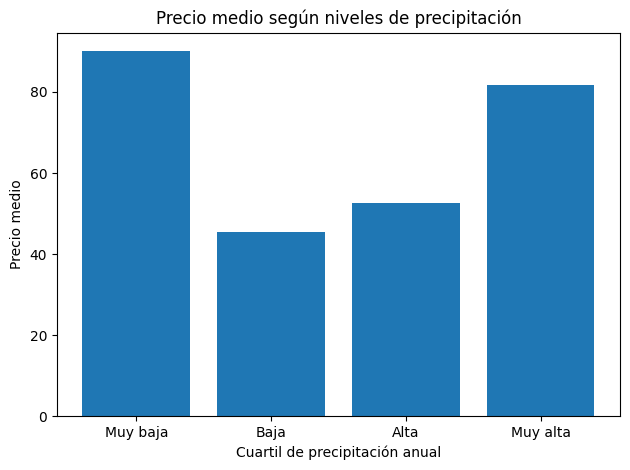

In [12]:
# 4b. Precio medio por cuartiles de precipitación anual
df["precip_bin"] = pd.qcut(
    df["precipitacion_media_anual_ene_dic(mm)"],
    q=4,
    labels=["Muy baja", "Baja", "Alta", "Muy alta"]
)

precio_precip = df.groupby("precip_bin")["precio"].mean().reset_index()
print(precio_precip)

plt.figure()
plt.bar(precio_precip["precip_bin"].astype(str), precio_precip["precio"])
plt.xlabel("Cuartil de precipitación anual")
plt.ylabel("Precio medio")
plt.title("Precio medio según niveles de precipitación")
plt.tight_layout()
plt.show()


Aunque el clima no explica bien la calidad percibida, sí vemos que los vinos procedentes de zonas muy secas o muy lluviosas tienden a situarse en segmentos de precio más altos, mientras que las regiones de precipitación intermedia se concentran en precios medios más bajos.

  tipo_año_precip    rating
0        Lluvioso  4.033239
1          Normal  3.929032
2            Seco  3.954315


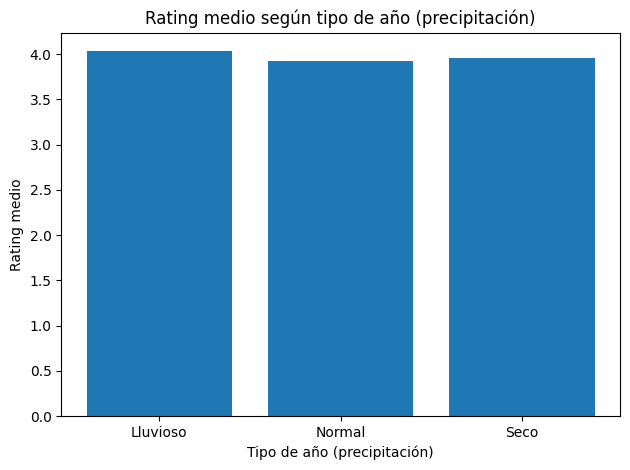

In [ ]:
# 5. Clasificar años según precipitación anual (seco / normal / lluvioso)
q25 = df["precipitacion_media_anual_ene_dic(mm)"].quantile(0.25)
q75 = df["precipitacion_media_anual_ene_dic(mm)"].quantile(0.75)

def clasificar_precip(x):
    if x <= q25:
        return "Seco"
    elif x >= q75:
        return "Lluvioso"
    else:
        return "Normal"

df["tipo_año_precip"] = df["precipitacion_media_anual_ene_dic(mm)"].apply(clasificar_precip)

rating_extremos = df.groupby("tipo_año_precip")["rating"].mean().reset_index()
print(rating_extremos)

plt.figure()
plt.bar(rating_extremos["tipo_año_precip"], rating_extremos["rating"])
plt.xlabel("Tipo de año (precipitación)")
plt.ylabel("Rating medio")
plt.title("Rating medio según tipo de año (precipitación)")
plt.tight_layout()
plt.show()


Al agrupar las añadas por tipo de año (seco, normal y lluvioso) apenas observamos diferencias en la valoración media de los vinos: los ratings se mantienen siempre en torno a 4 puntos. Es decir, dentro del rango de precipitación de nuestro dataset, el carácter seco o lluvioso del año no es un factor determinante en la calidad percibida

                                           nombre  rating  precio  \
39   Alonso del Yerro María Ribera del Duero 2015     4.4   52.90   
106         Arzuaga Reserva Ribera del Duero 2015     4.3   30.00   
137                         Balbas La Retama 2021     4.0   37.60   
168                      Bodega Emina Pasión 2022     3.7    8.96   
222    Bodegas Carramimbre Carramimbre Roble 2016     3.5   53.95   

     precipitacion_total_mensual(mm)  num_dias_temp_mayor30(c)  \
39                             20.80                      8.83   
106                            20.80                      8.83   
137                            28.73                      7.17   
168                            12.00                     10.00   
222                            29.20                      9.33   

     num_dias_temp_menor0(c)  temp_media_mes(c)  humedad_relativa(%)  \
39                      0.67              17.83                53.33   
106                     0.67              17

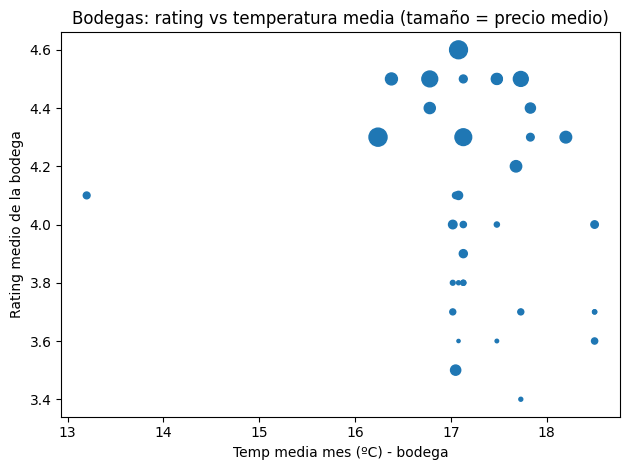

In [21]:
# 7. Perfil climático medio por bodega
bodega_grp = df.groupby("nombre").agg({
    "rating": "mean",
    "precio": "mean",
    "precipitacion_total_mensual(mm)": "mean",
    "num_dias_temp_mayor30(c)": "mean",
    "num_dias_temp_menor0(c)": "mean",
    "temp_media_mes(c)": "mean",
    "humedad_relativa(%)": "mean",
    "precipitacion_media_anual_ene_dic(mm)": "mean",
    "vintage_id": "count"
}).rename(columns={"vintage_id": "num_vinos"}).reset_index()

# Bodegas con al menos 3 vinos
bodega_top = bodega_grp[bodega_grp["num_vinos"] >= 3].copy()

print(bodega_top.head())

# Scatter: rating medio vs temp_media_mes(c); tamaño = precio medio
plt.figure()
plt.scatter(bodega_top["temp_media_mes(c)"], bodega_top["rating"], s=bodega_top["precio"])
plt.xlabel("Temp media mes (ºC) - bodega")
plt.ylabel("Rating medio de la bodega")
plt.title("Bodegas: rating vs temperatura media (tamaño = precio medio)")
plt.tight_layout()
plt.show()


Cuando agregamos por bodega, las más prestigiosas (rating > 4,4) y de mayor precio se concentran en climas de temperatura media moderada (en torno a 17 ºC), mientras que las bodegas en zonas algo más frías o más cálidas tienden a mostrar valoraciones y precios más contenidos. 

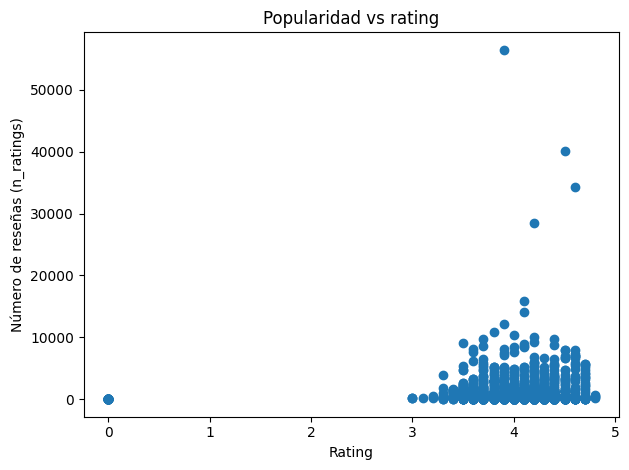

In [22]:
# 8a. Popularidad vs rating
plt.figure()
plt.scatter(df["rating"], df["n_ratings"])
plt.xlabel("Rating")
plt.ylabel("Número de reseñas (n_ratings)")
plt.title("Popularidad vs rating")
plt.tight_layout()
plt.show()


La popularidad está muy concentrada: unas pocas referencias con rating alrededor de 4,0–4,2 acumulan decenas de miles de reseñas, mientras que la gran mayoría de vinos, incluso bien valorados, apenas alcanzan unas pocas centenas. No se observan ‘blockbusters’ con mala nota: para ser masivo hace falta, como mínimo, un buen nivel de aceptación, pero la mayoría de vinos buenos siguen siendo de nicho.


                                         rating    precio  n_ratings  \
rating                                 1.000000  0.191142   0.066881   
precio                                 0.191142  1.000000   0.012427   
n_ratings                              0.066881  0.012427   1.000000   
precipitacion_total_mensual(mm)        0.021602 -0.055732  -0.007835   
num_dias_temp_mayor30(c)              -0.071577 -0.087426   0.006994   
num_dias_temp_menor0(c)               -0.115710 -0.045776   0.018308   
temp_media_mes(c)                     -0.086789 -0.135661  -0.012845   
humedad_relativa(%)                    0.138117  0.080919  -0.003791   
precipitacion_media_anual_ene_dic(mm)  0.074288 -0.042296  -0.082226   

                                       precipitacion_total_mensual(mm)  \
rating                                                        0.021602   
precio                                                       -0.055732   
n_ratings                                                

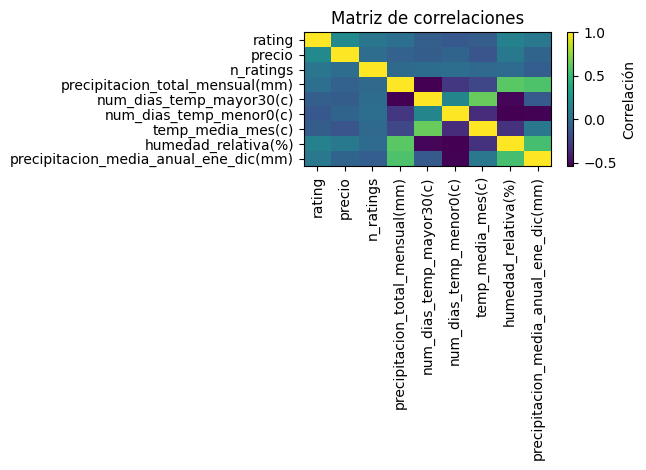

In [23]:
# 9. Matriz de correlación
corr_cols = ["rating", "precio", "n_ratings"] + cols_aemet
corr_matrix = df[corr_cols].corr()

print(corr_matrix)

plt.figure()
plt.imshow(corr_matrix, aspect="auto")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar(label="Correlación")
plt.title("Matriz de correlaciones")
plt.tight_layout()
plt.show()


La matriz de correlaciones confirma la historia: el rating del vino apenas se relaciona con las variables climáticas, mientras que su asociación con precio y número de reseñas es solo moderada. En cambio, las variables de AEMET sí presentan correlaciones fuertes entre ellas (más calor → más días >30 ºC y menos heladas; más precipitación → mayor humedad), lo que indica que el clima está bien capturado, pero no es el principal driver de la calidad percibida en nuestro dataset